In [1]:
import oot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
planet=oot.planet()
planet.M=1 #sun-like star
planet.R=1
planet.Mp=0.001 #jupiter-like planet
planet.Rp=0.1
planet.a=10 #close eccentric orbit
planet.e=0.5
planet.vTheta=np.pi/3 #viewed from an oblique angle
planet.vPhi=np.pi/3

period=oot.findT(2*np.pi,planet)
ts=period*(1-2*np.random.random(200))/2
ts=np.sort(ts)

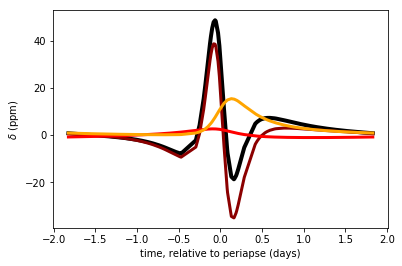

In [3]:
deltaSum=oot.deltaSum(ts,planet)
deltaTide=oot.deltaTide(ts,planet)
deltaBeam=oot.deltaBeam(ts,planet)
deltaReflect=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(365*ts,1e6*deltaSum,c='k',lw=4)
deltaPlot.plot(365*ts,1e6*deltaTide,c='darkred',lw=3)
deltaPlot.plot(365*ts,1e6*deltaBeam,c='red',lw=3)
deltaPlot.plot(365*ts,1e6*deltaReflect,c='orange',lw=3)
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.show()

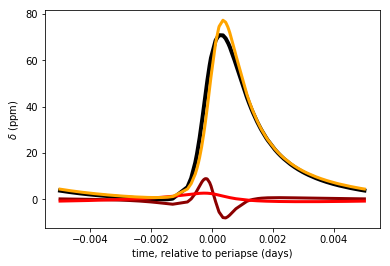

In [6]:
planet.beta=2 #star with a smaller response to tides
planet.Ag=0.5 #with a particularly reflective companion

deltaSum=oot.deltaSum(ts,planet)
deltaTide=oot.deltaTide(ts,planet)
deltaBeam=oot.deltaBeam(ts,planet)
deltaReflect=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(ts,1e6*deltaSum,c='k',lw=4)
deltaPlot.plot(ts,1e6*deltaTide,c='darkred',lw=3)
deltaPlot.plot(ts,1e6*deltaBeam,c='red',lw=3)
deltaPlot.plot(ts,1e6*deltaReflect,c='orange',lw=3)
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.show()